# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Create connection to database
conn1=sqlite3.connect('data.sqlite')

I used the conn1 here just incase other connections are needed later. I feel its better to prepare when its not needed to be safe.

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

Must be in CA
Must have CL over 25K
Returns Stores
Added creditLimit to make sure returning correct data

In [2]:
# Replace None with your code
df_ca_high= pd.read_sql("""
SELECT customerName, creditLimit
FROM customers
WHERE creditLimit > "25000.00"
;
""", conn1)

df_ca_high.head()

,customerName,creditLimit
0,Signal Gift Stores,71800.00
1,Baane Mini Imports,81700.00
2,"Blauer See Auto, Co.",59700.00
3,Mini Wheels Co.,64600.00
4,"Volvo Model Replicas, Co",53100.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [3]:
# Replace None with your code
df_collect= pd.read_sql("""
SELECT customerName, country
FROM customers
WHERE customerName LIKE "%Collect%" AND country IS NOT "USA"
;
""", conn1)

df_collect.head()

,customerName,country
0,"Australian Collectors, Co.",Australia
1,"Clover Collections, Co.",Ireland
2,"UK Collectables, Ltd.",UK
3,"King Kong Collectables, Co.",Hong Kong
4,Heintze Collectables,Denmark


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

The WHERE clause in the previous query looks at customer names and countries. Specifily the customer names uses the %% to check if any part of the name includes the word "Collect" even inside of another word like "Collectors". This helps determind which stores will be interested in a Collecting style marketing system. Then it checks the countries and just like it reads it looks for stores from the previous list that are NOT in the USA making them "International" at least from our perspective.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

Group by States
Average States CL
Find AVE S CL


In [4]:
# Replace None with your code
df_statecl=pd.read_sql("""
SELECT state, AVG("creditLimit") AS "Average Credit Limit"
FROM customers
WHERE country IS "USA"
GROUP BY state
ORDER BY "Average Credit Limit" DESC
;
""", conn1)

df_statecl.head(50)

,state,Average Credit Limit
0,NH,114200.000000
1,NY,89966.666667
2,PA,84766.666667
3,CA,83854.545455
4,NV,71800.000000
5,MA,70755.555556
6,CT,57350.000000
7,NJ,43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 1.0, 'Average Credit Limit by State')

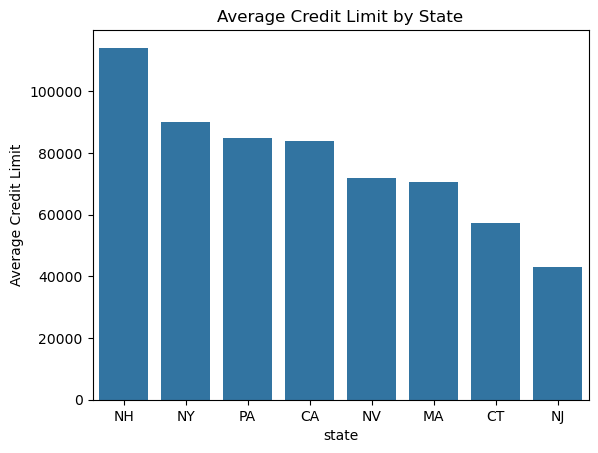

In [5]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
avg_cl_bar=sns.barplot(data=df_statecl,x="state", y="Average Credit Limit")
avg_cl_bar.set_title('Average Credit Limit by State')


### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


Need customer name, total payments
limit top 10
need to join customers and payments can do on customerNumber


In [6]:
# Replace None with your code
top_ten_df=pd.read_sql("""
SELECT customerName, SUM("amount") AS "Total Payment"
FROM customers
JOIN payments
    USING(customerNumber)
GROUP BY customerNumber
ORDER BY "Total Payment" DESC
LIMIT 10
;
""", conn1)

top_ten_df.head(10)

,customerName,Total Payment
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 1.0, 'Top 10 Customers')

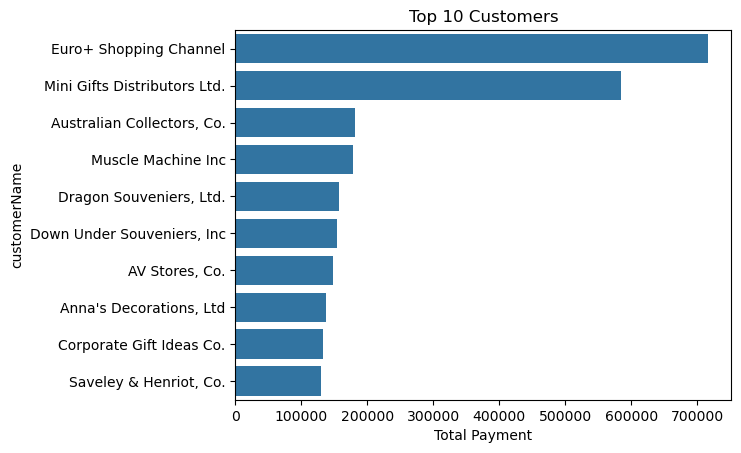

In [7]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
top_bar=sns.barplot(data=top_ten_df,x="Total Payment", y="customerName")
top_bar.set_title('Top 10 Customers') 

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

products with 10 or more units by customer


In [8]:
# Replace None with you code
pop_order_df=pd.read_sql("""
SELECT 
    c.customerName,
    p.productName,
    SUM(od.quantityOrdered) AS total_quantity
FROM orderdetails AS od
JOIN orders AS o
    USING (orderNumber)
JOIN customers AS c
    USING (customerNumber)
JOIN products AS p
    USING (productCode)
GROUP BY c.customerName, p.productName
HAVING total_quantity >= 10
ORDER BY total_quantity ASC;

""", conn1)

pop_order_df.head()

,customerName,productName,total_quantity
0,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10
1,Petit Auto,1913 Ford Model T Speedster,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,11
3,Tekni Collectables Inc.,American Airlines: B767-300,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,13


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

Return Sum quantity Ordered Count products in productline

find which are popular
which are diverse
*do more products get more orders




In [9]:
# Replace None with your code
pop_lines_df=pd.read_sql("""
SELECT COUNT(DISTINCT productCode) AS "Product Count", SUM(quantityOrdered) AS "Total Ordered", productLine
FROM products
JOIN orderdetails
    USING (productCode)
GROUP BY productLine
ORDER BY "Product Count" DESC

;
""", conn1)

pop_lines_df.head(10)

,Product Count,Total Ordered,productLine
0,37,35582,Classic Cars
1,24,22933,Vintage Cars
2,13,12778,Motorcycles
3,12,11872,Planes
4,11,11001,Trucks and Buses
5,9,8532,Ships
6,3,2818,Trains


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

Text(0.5, 1.0, 'Total Orders VS Number of Products')

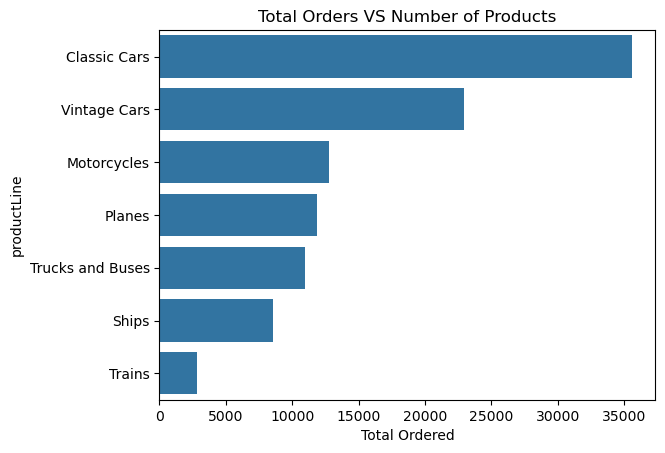

In [10]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
pop_line_plt=sns.barplot(data=pop_lines_df,y="productLine", x="Total Ordered")
pop_line_plt.set_title('Total Orders VS Number of Products') 

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!
I chose a bar chart because there isn't much information to digest and it can easily display all 7 product lines. I was able to show how many total orders where made for each line and order them by the total count of products while still keeping the name of each line as to be more understandable. Finally the chart shows that there does seem to be some kind of connection between number of products per line and the total ordered with more products having more orders.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [11]:
small_office_pf=pd.read_sql("""

SELECT officeCode, city
                    FROM employees
                    JOIN offices
                        USING (officeCode)
                    GROUP BY officeCode
                    HAVING COUNT(DISTINCT employeeNumber)<5

;
""",conn1)

small_office_pf.head(10)

,officeCode,city
0,2,Boston
1,3,NYC
2,5,Tokyo
3,6,Sydney
4,7,London


In [12]:
# Replace None with your code


remote_emplyees_df=pd.read_sql("""
SELECT employeeNumber, firstName, lastName, email, officeCode, reportsTo, city, phone, jobTitle
FROM employees
JOIN offices
    USING (officeCode)
WHERE officeCode IN (SELECT officeCode
                    FROM employees
                    JOIN offices
                        USING (officeCode)
                    GROUP BY officeCode
                    HAVING COUNT(DISTINCT employeeNumber)<5)

;
""",conn1)

remote_emplyees_df.head(10)

,employeeNumber,firstName,lastName,email,officeCode,reportsTo,city,phone,jobTitle
0,1088,William,Patterson,wpatterson@classicmodelcars.com,6,1056,Sydney,+61 2 9264 2451,Sales Manager (APAC)
1,1188,Julie,Firrelli,jfirrelli@classicmodelcars.com,2,1143,Boston,+1 215 837 0825,Sales Rep
2,1216,Steve,Patterson,spatterson@classicmodelcars.com,2,1143,Boston,+1 215 837 0825,Sales Rep
3,1286,Foon Yue,Tseng,ftseng@classicmodelcars.com,3,1143,NYC,+1 212 555 3000,Sales Rep
4,1323,George,Vanauf,gvanauf@classicmodelcars.com,3,1143,NYC,+1 212 555 3000,Sales Rep
5,1501,Larry,Bott,lbott@classicmodelcars.com,7,1102,London,+44 20 7877 2041,Sales Rep
6,1504,Barry,Jones,bjones@classicmodelcars.com,7,1102,London,+44 20 7877 2041,Sales Rep
7,1611,Andy,Fixter,afixter@classicmodelcars.com,6,1088,Sydney,+61 2 9264 2451,Sales Rep
8,1612,Peter,Marsh,pmarsh@classicmodelcars.com,6,1088,Sydney,+61 2 9264 2451,Sales Rep
9,1619,Tom,King,tking@classicmodelcars.com,6,1088,Sydney,+61 2 9264 2451,Sales Rep


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!

First I wanted to find offices with less than 5 employees. I felt like that could be the guts of my subquery even if it needed a bit of tweeking once inserted. Then I just wrote a query that could return all of the relevant data including id information like names and employee numbers, information for getting a hold of the employee like office number and emails, finally I added job titles, office codes, and cities. I left off the employee's extention because the idea is to move everyone at the office to remote so getting a hold of a singluar employee didn't feel as neccesary but could easily be added if the client requested it.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [13]:
# Replace None with your code
conn1.close

<function Connection.close()>

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [14]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [15]:
# Begin your code here
read=pd.read_sql

In [16]:
basics_df=read("""
SELECT *
FROM movie_basics
;
""", conn4)
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [17]:
akas_df=read("""
SELECT *
FROM movie_akas
;
""", conn4)
akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [18]:
principals_df=read("""
SELECT *
FROM principals
;
""", conn4)
principals_df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [19]:
known_df=read("""
SELECT *
FROM known_for
;
""", conn4)
known_df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [20]:
directors_df=read("""
SELECT *
FROM directors
;
""", conn4)
directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [21]:
writers_df=read("""
SELECT *
FROM writers
;
""", conn4)
writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [22]:
persons_df=read("""
SELECT *
FROM persons
;
""", conn4)
persons_df

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [23]:
ratings_df=read("""
SELECT *
FROM movie_ratings
;
""", conn4)
ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [24]:
numvotes_df=read("""
SELECT AVG(numvotes) AS "Average", MAX(numvotes) AS "Max", MIN(numvotes) AS "Min"
FROM movie_ratings
WHERE numvotes > 0
;
""",conn4)
numvotes_df

,Average,Max,Min
0,3523.662167,1841066,5


In [25]:
numvotes_df=read("""
SELECT AVG(numvotes) AS "Average", MAX(numvotes) AS "Max", MIN(numvotes) AS "Min"
FROM movie_ratings
WHERE numvotes > 100
;
""",conn4)
numvotes_df

,Average,Max,Min
0,9040.799497,1841066,101


In [26]:
runtime_rate_df=read("""
SELECT runtime_minutes, AVG(averagerating) AS "Average Rating"
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
WHERE numvotes > 100 AND start_year <= 2019 AND runtime_minutes >= 90 AND runtime_minutes <=150
GROUP BY runtime_minutes
ORDER BY runtime_minutes DESC

;
""",conn4)
runtime_rate_df

,runtime_minutes,Average Rating
0,150.0,6.199180
1,149.0,6.634211
2,148.0,6.478462
3,147.0,6.590385
4,146.0,6.134694
...,...,...
56,94.0,5.752430
57,93.0,5.761208
58,92.0,5.671327
59,91.0,5.585023


Text(0.5, 1.0, 'Movies Runtime vs Rating')

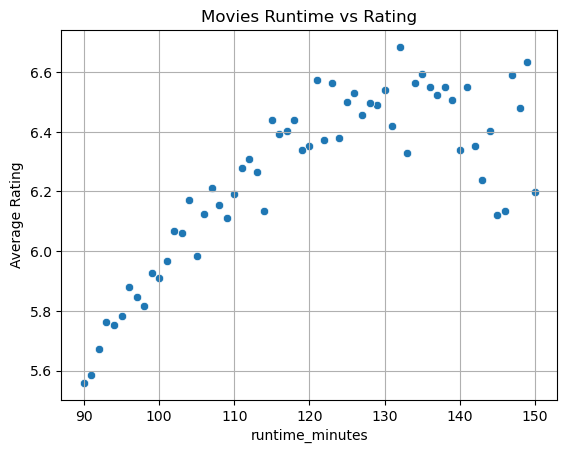

In [27]:
runtime_rate_plt=sns.scatterplot(data=runtime_rate_df,x="runtime_minutes", y="Average Rating")
runtime_rate_plt.grid(True)
runtime_rate_plt.set_title('Movies Runtime vs Rating') 

1. reviews should have a confindence score based on rating vs numvotes. after some searching for a solution for the confindence score I found that IMDb already does this so the averagerating score is probably good enough. I still probably want to limit my queries to have a floor num of votes. Looks like if I put the floor at 100 reviews my average number of reviews jumps from 3500 to just over 9000. There also seems to be some outliers on run length. I will add paramiters to the define the min and max length of a movie. A search results in a reasonable movie being between 90 and 150 minutes.

3. QUESTION: Do longer or shorter movies get better reviews.

4. ANSWER: Based on the plot overall longer movies get better reivews but there is a point of diminishing returns. Just past the 2 hour (120 minute) mark the average rating starts to go down. However, it does still stay higher than movies below the 110 minute mark.

5. I did most of my cleaning in SQL as I went trying to find some solid data. For this query the imporant cleaning points would be to remove data that is too new (about 1000 records), make a clear definition of the length of a movie (maybe we want short films or maybe we want more standard length like I chose), and remove or adjust NULL values.



In [28]:
runtime_df=read("""
SELECT primary_title, runtime_minutes
FROM movie_basics
WHERE runtime_minutes IS NULL
;
""",conn4)
runtime_df

,primary_title,runtime_minutes
0,Sabse Bada Sukh,None
1,Bigfoot,None
2,O Silêncio,None
3,How Huang Fei-hong Rescued the Orphan from the...,None
4,Godfather,None
...,...,...
31734,Bobbyr Bondhura,None
31735,The Secret of China,None
31736,Rodolpho Teóphilo - O Legado de um Pioneiro,None
31737,Dankyavar Danka,None


In [29]:
same_name_df=read("""
SELECT primary_title
FROM movie_basics
WHERE primary_title = original_title
;
""",conn4)
same_name_df

,primary_title
0,Sunghursh
1,The Other Side of the Wind
2,Sabse Bada Sukh
3,A Thin Life
4,Bigfoot
...,...
131635,Kuambil Lagi Hatiku
131636,Rodolpho Teóphilo - O Legado de um Pioneiro
131637,Dankyavar Danka
131638,6 Gunn


In [30]:
too_new_df=read("""
SELECT primary_title, start_year
FROM movie_basics
WHERE start_year > 2019
;
""",conn4)

too_new_df

,primary_title,start_year
0,Mortal Kombat,2021
1,Masters of the Universe,2021
2,Without Remorse,2020
3,The Witches,2020
4,Jungle Cruise,2020
...,...,...
1058,Equally Friends,2020
1059,Dream Horse,2020
1060,Nuestra última fiesta,2020
1061,Bulletproof 2,2020


In [31]:
conn4.close

<function Connection.close()>